In [13]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import imageio
import torch, pickle
from scipy.interpolate import interp1d

/home/kaeryv/prj/aeparch_reboot/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


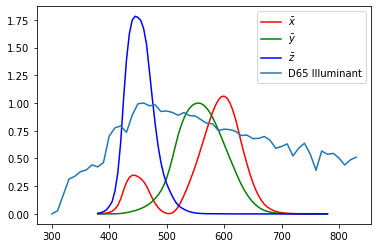

In [14]:
cmf = np.loadtxt("../data/cie-cmf.txt")
D65 = np.loadtxt("../data/d65.m", delimiter=",")
fig, ax = plt.subplots()
ax.plot(cmf[:, 0], cmf[:, 1], 'r', label="$\\bar x$")
ax.plot(cmf[:, 0], cmf[:, 2], 'g', label="$\\bar y$")
ax.plot(cmf[:, 0], cmf[:, 3], 'b', label="$\\bar z$")
ax.plot(D65[:, 0], D65[:, 1] / np.max(D65[:, 1]), label='D65 Illuminant')
plt.legend()

## Première manip: retrouver la couleur de l'illuminant D65 et d'un de vos spectres
A partir du spectre D65, retrouvez la position dans l'espace CIE, ensuite dans l'espace RBG

## Seconde manip: créer un graphe CIE
Pour chaque coordonnée CIE XY(Z), retrouvez le RGB -> obtenir le diagramme de chromaticité ci-dessous

(-0.5, 431.5, 287.5, -0.5)

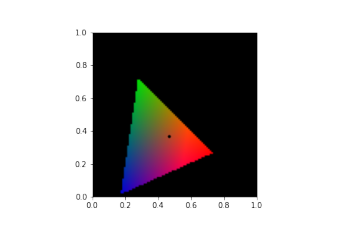

In [12]:
plt.imshow(imageio.imread("../data/obj.png"))
plt.axis("off")

## Troisème manip: Trouver la couleur de chaque point de l'espace latent
Echantillonner tout l'espace latent: $[-1, 1]^2$ afin de représenter la couleur en chaque endroit.
Pour ce faire, vous génèrerez le spectre en chaque point pour ensuite passer en rgb.